# **Import libraries**

In [1]:
# Libraries for building and evaluating the CLV model
import lifetimes
from lifetimes import BetaGeoFitter, GammaGammaFitter
from lifetimes.utils import *
from lifetimes.plotting import *
from sklearn.metrics import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# **Dataset**

In [2]:
df = pd.read_csv('online_retail_II.csv')

In [3]:
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.tail(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


# **1,067,371 Rows before clean**

In [5]:
df.shape

(1067371, 8)

# **Check Null values**

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB
None


# **Null Value**
# **Description: 4382 rows**
# **ID: 243007 rows**

In [7]:
print(df.isnull().sum())

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


# **Fill Null Data**

In [8]:
# Fill missing values in 'Customer ID' and rename the column to 'CustomerID'
df['Customer ID'] = df['Customer ID'].fillna('Unknown')
df.rename(columns={'Customer ID': 'CustomerID'}, inplace=True)

In [9]:
df_cleaned = df.dropna()

# **1,062,989  rows after clean NaN value**

In [10]:
print(df_cleaned.info())
print(df_cleaned.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 1062989 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1062989 non-null  object 
 1   StockCode    1062989 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1062989 non-null  int64  
 4   InvoiceDate  1062989 non-null  object 
 5   Price        1062989 non-null  float64
 6   CustomerID   1062989 non-null  object 
 7   Country      1062989 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 73.0+ MB
None
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
CustomerID     0
Country        0
dtype: int64


# **Check nagative value**

In [11]:
df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0)]
df_cleaned = df_cleaned[(df['Price']) >= 0]

# **1,042,723 rows after clean negative value**

In [12]:
print(df_cleaned.info())
print(df_cleaned.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 1042723 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1042723 non-null  object 
 1   StockCode    1042723 non-null  object 
 2   Description  1042723 non-null  object 
 3   Quantity     1042723 non-null  int64  
 4   InvoiceDate  1042723 non-null  object 
 5   Price        1042723 non-null  float64
 6   CustomerID   1042723 non-null  object 
 7   Country      1042723 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 71.6+ MB
None
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
CustomerID     0
Country        0
dtype: int64


In [13]:
df_cleaned['Total']= df_cleaned['Price'] *df_cleaned['Quantity']
df_cleaned.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0


In [14]:
print(df_cleaned.info())
print(df_cleaned.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 1042723 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1042723 non-null  object 
 1   StockCode    1042723 non-null  object 
 2   Description  1042723 non-null  object 
 3   Quantity     1042723 non-null  int64  
 4   InvoiceDate  1042723 non-null  object 
 5   Price        1042723 non-null  float64
 6   CustomerID   1042723 non-null  object 
 7   Country      1042723 non-null  object 
 8   Total        1042723 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 79.6+ MB
None
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
CustomerID     0
Country        0
Total          0
dtype: int64


In [15]:
df_cleaned[['Quantity','Price','Total']].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,1042723.0,11.019149,127.689626,1.0,1.00,3.00,10.00,80995.00
Price,1042723.0,4.072925,51.423182,0.0,1.25,2.10,4.13,25111.09
Total,1042723.0,20.113653,203.015172,0.0,3.90,9.96,17.70,168469.60


# **5469 Products**

In [16]:
df_cleaned['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER     5783
REGENCY CAKESTAND 3 TIER               4065
JUMBO BAG RED RETROSPOT                3395
ASSORTED COLOUR BIRD ORNAMENT          2939
PARTY BUNTING                          2742
                                       ... 
dotcomstock                               1
SET 10 CARDS SNOWY ROBIN 17099            1
SET 10 CARDS SWIRLY XMAS TREE 17104       1
amazon adjust                             1
PAPER CRAFT , LITTLE BIRDIE               1
Name: count, Length: 5469, dtype: int64

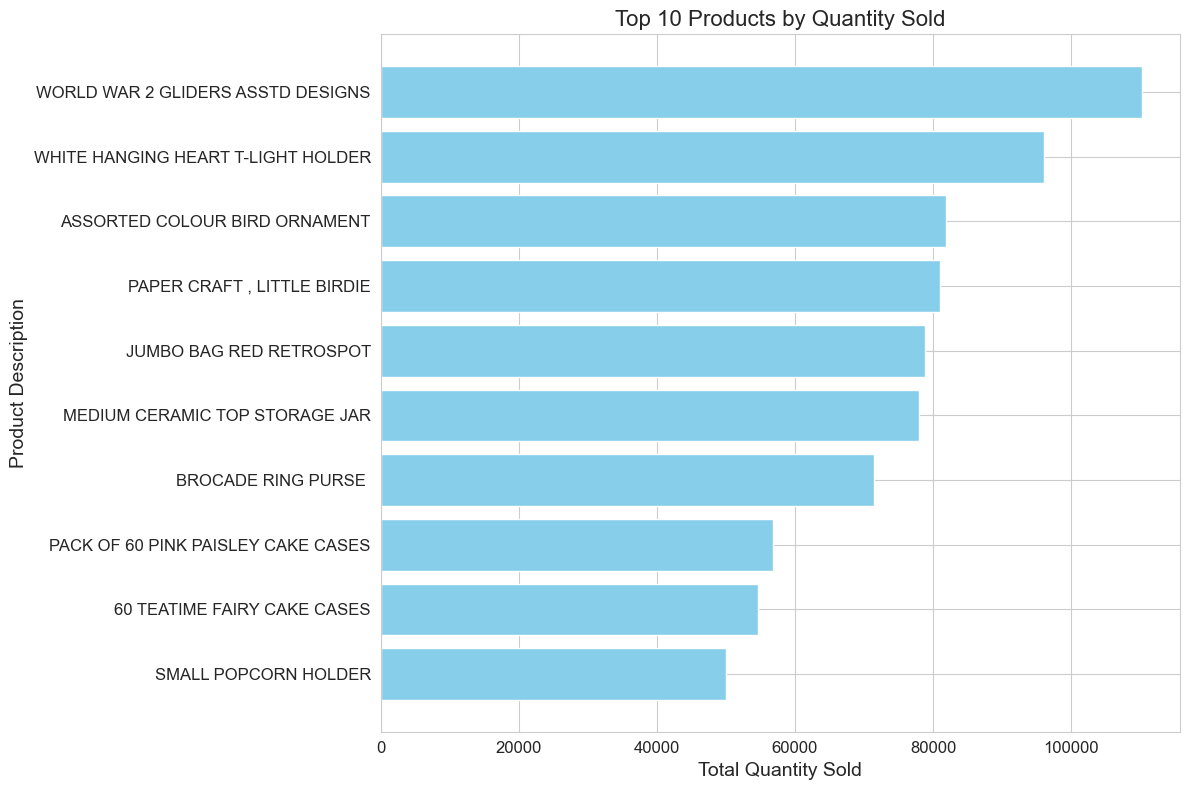

In [17]:
TopProducts = df_cleaned.pivot_table(
    index=['StockCode', 'Description'],
    values='Quantity',
    aggfunc='sum'
).sort_values(by='Quantity', ascending=False)

TopProducts.reset_index(inplace=True)

# Selecting the top 10 products
top_10_products = TopProducts.head(10)

# Plotting with Matplotlib
plt.figure(figsize=(12, 8))
plt.barh(top_10_products['Description'], top_10_products['Quantity'], color='skyblue')
plt.title('Top 10 Products by Quantity Sold', fontsize=16)
plt.xlabel('Total Quantity Sold', fontsize=14)
plt.ylabel('Product Description', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# **Check transaction by Year and Month**

In [18]:
# Convert "InvoiceDate" to datetime format
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Extract the year and month from the "InvoiceDate" column
df_cleaned['Year-Month'] = df_cleaned['InvoiceDate'].dt.to_period('M')

# Count the number of rows for each month
monthly_counts = df_cleaned.groupby('Year-Month').size()

# Display the result
print(monthly_counts)

# Calculate total
print("Total transaction: " + str(monthly_counts.sum()))

Year-Month
2009-12    43966
2010-01    30642
2010-02    28287
2010-03    40394
2010-04    33307
2010-05    33833
2010-06    38983
2010-07    32510
2010-08    32556
2010-09    41120
2010-10    57871
2010-11    76483
2010-12    63699
2011-01    34319
2011-02    27159
2011-03    35843
2011-04    29108
2011-05    36250
2011-06    36018
2011-07    38661
2011-08    34522
2011-09    49285
2011-10    59337
2011-11    83444
2011-12    25126
Freq: M, dtype: int64
Total transaction: 1042723


In [19]:
from analysis.monthly_transaction import *

# **43,966 transactions in 2009**

Total transactions: 43966


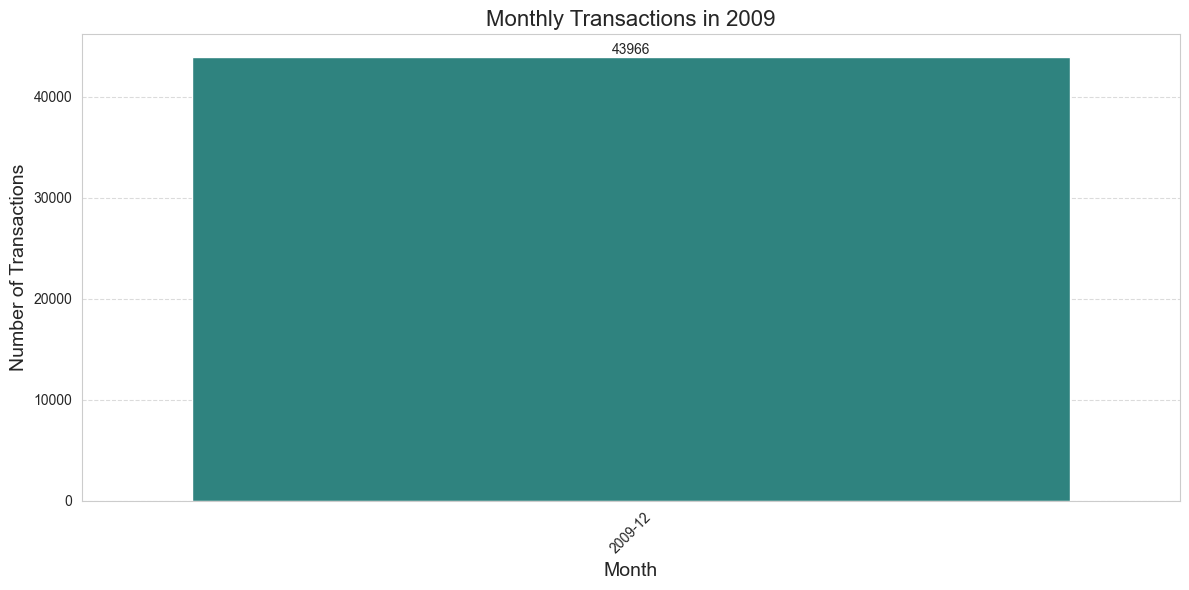

In [20]:
plot_monthly_transactions(df_cleaned, 2009)

# **509,685 transactions in 2010**

Total transactions: 509685


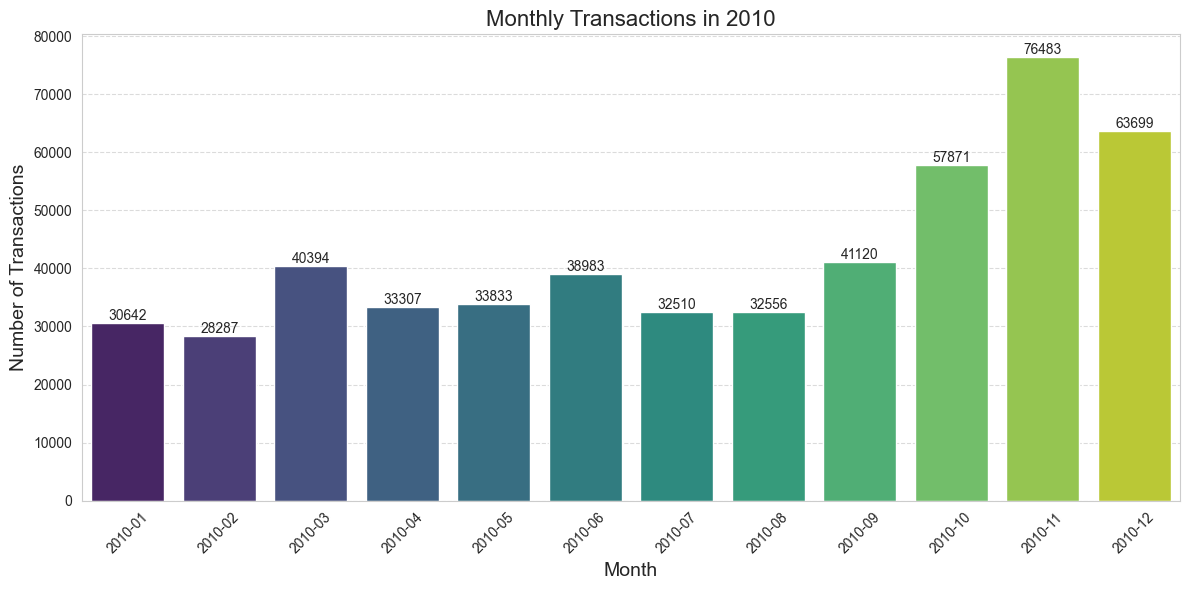

In [21]:
plot_monthly_transactions(df_cleaned, 2010)

# **489,072 transactions in 2011**

Total transactions: 489072


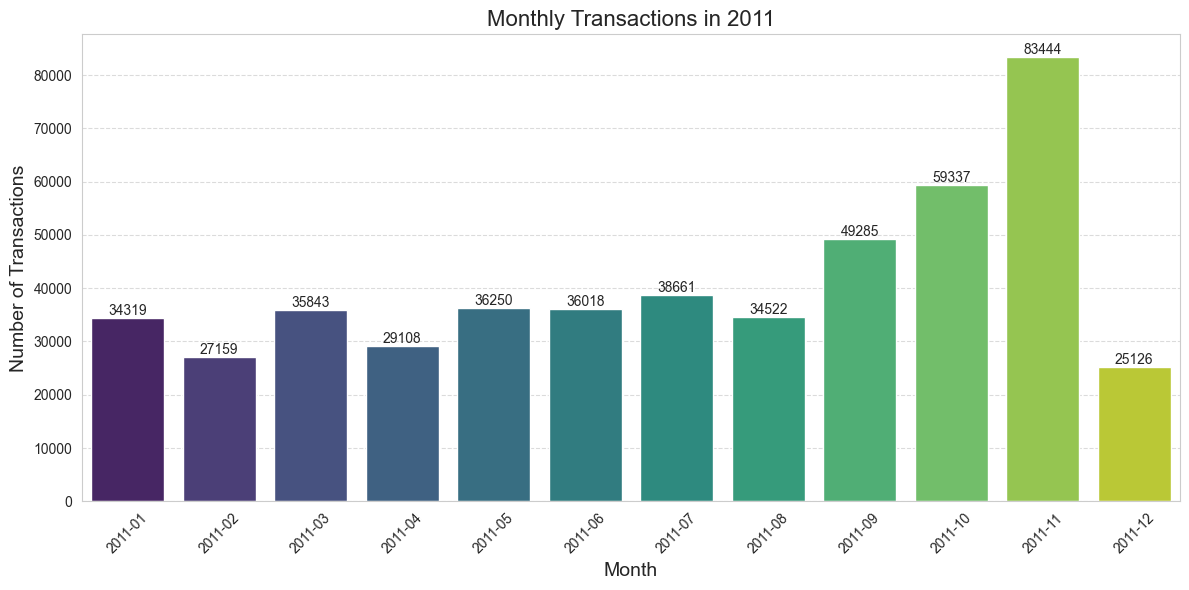

In [22]:
plot_monthly_transactions(df_cleaned, 2011)

<Axes: xlabel='Price', ylabel='Quantity'>

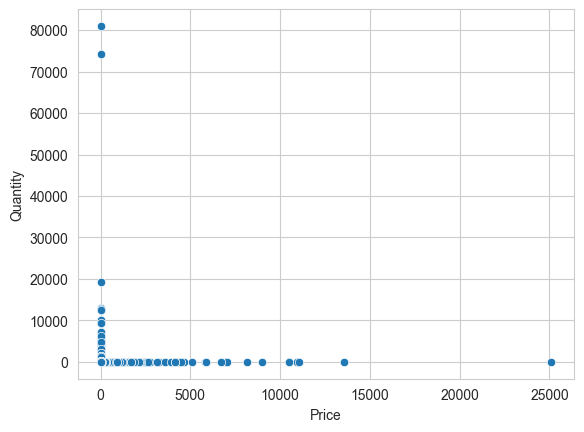

In [23]:
sns.scatterplot(x='Price',y='Quantity',data=df_cleaned)

In [24]:
df_cleaned.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'CustomerID', 'Country', 'Total', 'Year-Month', 'YearMonth'],
      dtype='object')

# **Buy Till You Die (BTYD) Framework**

In [25]:
import datetime as dt

# Define of end of observation period
last_global_purchase = df_cleaned['InvoiceDate'].max()

# Define end of calibration period
n_months = 6
cal_period_end = last_global_purchase - dt.timedelta(days=(n_months * 30))

# Calibration period RFM data
clv_cal = summary_data_from_transaction_data(
    df_cleaned, 
    'CustomerID', 'InvoiceDate', 'Total',
    observation_period_end=cal_period_end,
    include_first_transaction=False
)

# Holdout period RFM data
clv_holdout = summary_data_from_transaction_data(
    df_cleaned[df_cleaned['InvoiceDate'] > cal_period_end], 
    'CustomerID', 'InvoiceDate', 'Total',
    observation_period_end=last_global_purchase,
    include_first_transaction=True
)

# Combine two the DataFrame
cal_and_holdout_data = clv_cal.copy()
cal_and_holdout_data = cal_and_holdout_data.rename(
    columns={'recency': 'recency_cal', 
             'frequency': 'frequency_cal', 
             'monetary_value': 'monetary_value_cal', 
             'T': 'T_cal'})
cal_and_holdout_data['frequency_holdout'] = clv_holdout['frequency']
cal_and_holdout_data['monetary_value_holdout'] = clv_holdout['monetary_value']
cal_and_holdout_data['duration_holdout'] = n_months * 30

# We only need customers who have repeat purchase
cal_and_holdout_data = cal_and_holdout_data[cal_and_holdout_data['frequency_cal'] > 0].fillna(0)

cal_and_holdout_data.head()

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout
CustomerID,,,,,,,
12346.0,7.0,400.0,545.0,11066.637143,0.0,0.000000,180
12347.0,4.0,221.0,224.0,729.435000,3.0,701.350000,180
12348.0,3.0,190.0,258.0,495.746667,1.0,310.000000,180
12349.0,2.0,182.0,409.0,801.310000,1.0,1757.550000,180
12352.0,5.0,130.0,212.0,352.372000,3.0,314.743333,180


# **BG/NBD Model for Predicting the Number of Purchase**
# **Fitting and Optimizing the Model**

In [27]:
import numpy as np

best_rmse = 1e+9

# Find the best l2 coefficient
for coef in range(1, 11):
    coef = coef / 100
    bgf = BetaGeoFitter(penalizer_coef=coef)
    # Fit the model with calibration period data
    bgf.fit(cal_and_holdout_data['frequency_cal'], 
            cal_and_holdout_data['recency_cal'], 
            cal_and_holdout_data['T_cal'])
    # Use calibration period data to predict number of purchases in the holdout period
    pred_freq = pd.DataFrame(
        bgf.conditional_expected_number_of_purchases_up_to_time(
            cal_and_holdout_data['duration_holdout'], # Number of days to predict
            cal_and_holdout_data['frequency_cal'], 
            cal_and_holdout_data['recency_cal'], 
            cal_and_holdout_data['T_cal']
        ), columns=['pred_freq']).reset_index()
    # Combine two DataFrame
    new_df = cal_and_holdout_data.reset_index().merge(pred_freq, on='CustomerID').dropna()
    # Compute the differences between predicted and actual purchases
    rmse = np.sqrt(mean_squared_error(new_df['frequency_holdout'], new_df['pred_freq']))
    # Find the best l2 coefficient with the lowest rmse
    if rmse < best_rmse:
        best_rmse = rmse
        best_coef = coef

# **Assessing Model Fit**

The best l2 coefficient: 0.1
Root mean squared error: 2.087

Number of of purchases for the next 6 months...
- Actual: 7188
- Predited: 7359
Percentage error: 2.384%



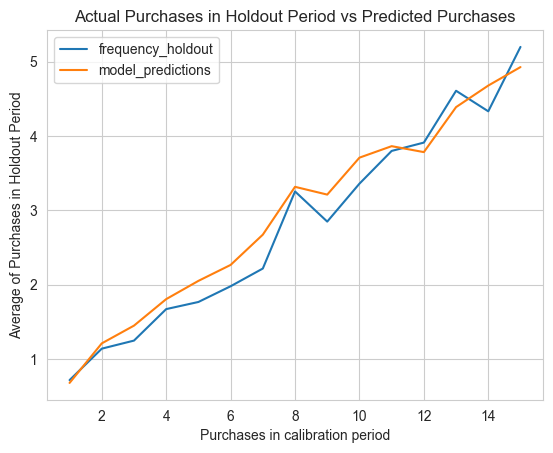

In [28]:
# Get the result
print(f"""The best l2 coefficient: {best_coef}
Root mean squared error: {best_rmse:.3f}""")

# Fit the model with the best l2 coefficient
bgf = BetaGeoFitter(penalizer_coef=best_coef)
# Fit the model with calibration period data
bgf.fit(
    cal_and_holdout_data['frequency_cal'], 
    cal_and_holdout_data['recency_cal'], 
    cal_and_holdout_data['T_cal']
)

# Predict purchases in the next n days
cal_and_holdout_data[f'exp_purchases_next_{n_months}m'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    n_months * 30, # Number of days to predict
    cal_and_holdout_data['frequency_cal'],
    cal_and_holdout_data['recency_cal'], 
    cal_and_holdout_data['T_cal']
)
actual_purchase = cal_and_holdout_data['frequency_holdout'].sum()
pred_purchase = cal_and_holdout_data[f'exp_purchases_next_{n_months}m'].sum()
percentage_error_purchase = abs(pred_purchase - actual_purchase) / actual_purchase

print(f"""
Number of of purchases for the next {n_months} months...
- Actual: {actual_purchase.astype(int)}
- Predited: {pred_purchase.astype(int)}""")
print(f"Percentage error: {percentage_error_purchase:.3%}\n")

# Compare the differences between predicted and actual purchases visually
plot_calibration_purchases_vs_holdout_purchases(bgf, cal_and_holdout_data, n=15);

# **Gamma-Gamma Model for Estimating CLV**

In [29]:
display(cal_and_holdout_data[['frequency_cal', 'monetary_value_cal']].corr())

,frequency_cal,monetary_value_cal
frequency_cal,1.00000,0.19093
monetary_value_cal,0.19093,1.00000


# **Fitting and Optimizing the Model**

In [31]:
# Compute clv for holdout period
cal_and_holdout_data['clv_holdout'] = (
    cal_and_holdout_data['frequency_holdout'] * cal_and_holdout_data['monetary_value_holdout']
    )

best_rmse = 1e+9

# Find the best discount rate
for coef in range(1, 11):
    coef = coef / 100
    for discount_rate in range(1, 11):
        discount_rate = discount_rate / 100
        # Fit the model with calibration period data
        ggf = GammaGammaFitter(penalizer_coef=coef)
        ggf.fit(
            cal_and_holdout_data['frequency_cal'],
            cal_and_holdout_data['monetary_value_cal']
        )
        # Use calibration period data to predict clv in the holdout period
        pred_clv = pd.DataFrame(
            ggf.customer_lifetime_value(
                bgf,
                cal_and_holdout_data['frequency_cal'],
                cal_and_holdout_data['recency_cal'],
                cal_and_holdout_data['T_cal'],
                cal_and_holdout_data['monetary_value_cal'],
                time=n_months, # Number of months to predict
                freq='D',
                discount_rate=discount_rate
            )
        ).reset_index()
        # Combine two DataFrame
        new_df = cal_and_holdout_data.reset_index().merge(pred_clv, on='CustomerID').dropna()
        new_df = new_df.rename(columns={'clv': 'pred_clv'})
        # Compute the differences between predicted and actual clv
        rmse = np.sqrt(mean_squared_error(new_df['clv_holdout'], new_df['pred_clv']))
        # Find the best discount rate with the lowest rmse
        if rmse < best_rmse:
            best_rmse = rmse
            best_coef = coef
            best_discount_rate = discount_rate

# **Assessing Model Fit**

In [32]:
ggf = GammaGammaFitter(penalizer_coef=best_coef)
ggf.fit(
    cal_and_holdout_data['frequency_cal'],
    cal_and_holdout_data['monetary_value_cal']
)
cal_and_holdout_data[f'exp_clv_next_{n_months}m'] = ggf.customer_lifetime_value(
    bgf,
    cal_and_holdout_data['frequency_cal'],
    cal_and_holdout_data['recency_cal'],
    cal_and_holdout_data['T_cal'],
    cal_and_holdout_data['monetary_value_cal'],
    time=n_months, # Number of months to predict
    freq='D',
    discount_rate=best_discount_rate
)

rmse = np.sqrt(mean_squared_error(
    cal_and_holdout_data['clv_holdout'], 
    cal_and_holdout_data[f'exp_clv_next_{n_months}m']
))
actual_clv = cal_and_holdout_data['clv_holdout'].sum()
pred_clv = cal_and_holdout_data[f'exp_clv_next_{n_months}m'].sum()
percentage_error_clv = abs(pred_clv - actual_clv) / actual_clv

print(f"""The best l2 coefficient: {best_coef}
The best discount rate: {best_discount_rate}
Root mean squared error: {rmse:.3f}""")
print(f"""
Revenue for the next {n_months} months:
- Actual: {actual_clv.astype(int)}
- Predicted: {pred_clv.astype(int)}""")
print(f"Percentage error: {percentage_error_clv:.3%}")

The best l2 coefficient: 0.01
The best discount rate: 0.01
Root mean squared error: 6857.196

Revenue for the next 6 months:
- Actual: 5135877
- Predicted: 4322551
Percentage error: 15.836%


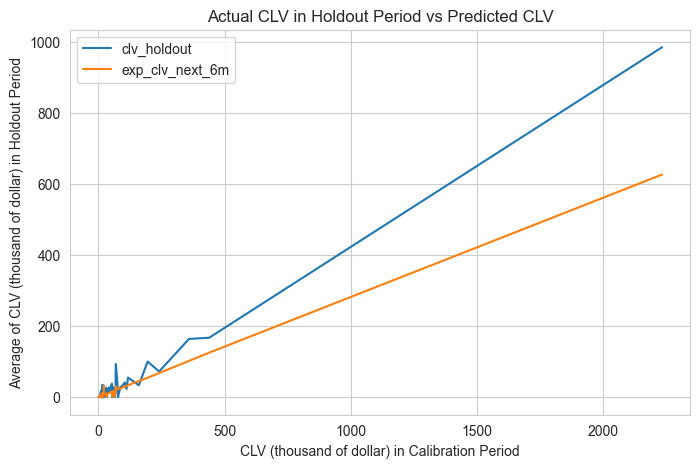

In [33]:
from analysis.calibration_clv_vs_holdout import *

plot_calibration_clv_vs_holdout_clv(cal_and_holdout_data, n_months);

# **Segmentation Using CLV**

In [34]:
clv_segment = cal_and_holdout_data.copy()
clv_segment['segment'] = pd.qcut(
    clv_segment[f'exp_clv_next_{n_months}m'], 
    4,
    labels=['Churned', 'Need Attention', 'Loyal Customers', 'Champions']
)
display(
    clv_segment[['frequency_holdout', 
                 'clv_holdout',
                 f'exp_purchases_next_{n_months}m', 
                 f'exp_clv_next_{n_months}m',
                 'segment']].sort_values(
        by=f'exp_clv_next_{n_months}m',
        ascending=False
    ).head())

,frequency_holdout,clv_holdout,exp_purchases_next_6m,exp_clv_next_6m,segment
CustomerID,,,,,
Unknown,141.0,985256.85,118.760605,626835.260648,Champions
18102.0,16.0,167527.67,14.740457,125461.533082,Champions
14646.0,25.0,164070.10,19.093019,102090.051313,Champions
14156.0,28.0,72514.28,26.895204,68007.740884,Champions
14911.0,82.0,100435.38,50.076450,54842.298419,Champions


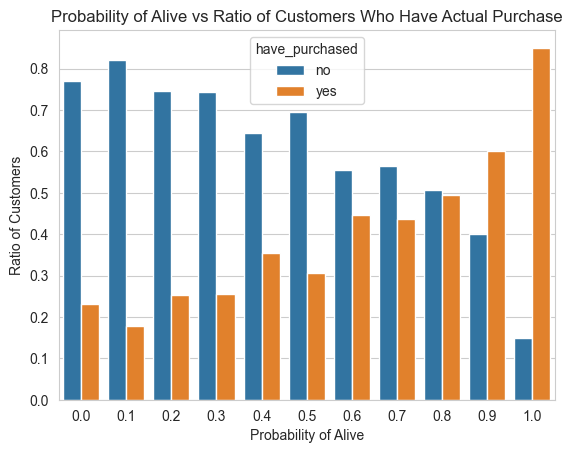

In [35]:
from analysis.holdout_purchase_vs_prob_alive import *

plot_holdout_purchase_vs_prob_alive(cal_and_holdout_data,bgf);

In [36]:
df_cleaned.to_csv("final_cleaned_dataset.csv")